In [ ]:
!pip install transitions
from transitions import Machine
import time
import random  # Импортируем для имитации возможной ошибки


class WashingMachine(object):
   pass

machine = WashingMachine()

# Определение состояний
states = ['idle', 'filling', 'washing', 'draining', 'defective']

# Определение переходов
transitions = [
    {'trigger': 'start', 'source': 'idle', 'dest': 'filling'},
    {'trigger': 'level_reached', 'source': 'filling', 'dest': 'washing'},
    {'trigger': 'timer_done', 'source': 'washing', 'dest': 'draining'},
    {'trigger': 'timer_failed', 'source': 'washing', 'dest': 'defective'},
    {'trigger': 'level_drained', 'source': 'draining', 'dest': 'idle'},
    {'trigger': 'reset', 'source': 'defective', 'dest': 'idle'},
]

washing_machine = Machine(machine, states=states, transitions=transitions, initial='idle')

# Имитация залива воды (d1)
def fill_water():
    print("Заливаем воду...")
    machine.level_reached()

def wash():
    print("Стирка...")
    # Имитация  таймера
    if random.random() < 0.5:
            print("Ошибка таймера! Машина переходит в состояние 'defective'")
            machine.timer_failed()
    else:
            print("Таймер успешно завершил работу.")
            machine.timer_done()

# Имитация слива воды (d2)
def drain_water():
    print("Сливаем воду...")
    machine.level_drained()

def simulate_washing():
  print("Начинаем стирку...")
  machine.start()  # Переход в состояние 'filling'
  fill_water()  # Переход в состояние 'washing'
  wash()  # Переход в состояние 'draining' или 'defective'
  if machine.state != 'defective':
      drain_water()
  else:
      print("Требуется ремонт")
      machine.reset()
      print(machine.state)


simulate_washing()

Начинаем стирку...
Заливаем воду...
Стирка...
Ошибка таймера! Машина переходит в состояние 'defective'
Требуется ремонт
idle


In [ ]:
machine.state

'idle'

In [ ]:
machine.start()
machine.state


'filling'

In [ ]:
fill_water()
machine.state


Заливаем воду...


'washing'

In [ ]:
wash()
machine.state


Стирка...
Таймер успешно завершил работу.


'draining'

In [ ]:
if machine.state != 'defective':
      drain_water()
else:
      print("Ремонт")
      machine.reset()
machine.state

Сливаем воду...


'idle'

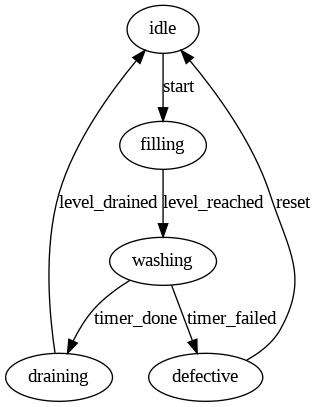

In [ ]:
!pip install graphviz
from graphviz import Digraph
from IPython.display import Image

# Создание объекта для графа
dot = Digraph(comment='Система управления стиральной машиной')

# Определение состояний
states = ['idle', 'filling', 'washing', 'draining', 'defective']

# Добавление состояний в граф
for state in states:
    dot.node(state, state)

# Определение переходов
transitions = [
    {'trigger': 'start', 'source': 'idle', 'dest': 'filling'},
    {'trigger': 'level_reached', 'source': 'filling', 'dest': 'washing'},
    {'trigger': 'timer_done', 'source': 'washing', 'dest': 'draining'},
    {'trigger': 'timer_failed', 'source': 'washing', 'dest': 'defective'},
    {'trigger': 'level_drained', 'source': 'draining', 'dest': 'idle'},
    {'trigger': 'reset', 'source': 'defective', 'dest': 'idle'},
]

# Добавление переходов в граф
for transition in transitions:
    dot.edge(transition['source'], transition['dest'], label=transition['trigger'])

# Рендеринг графа в файл формата PNG
graph = dot.render('state_graph', format='png', engine='dot', view=True)
Image(graph)